In [149]:
import pandas as pd

In [150]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


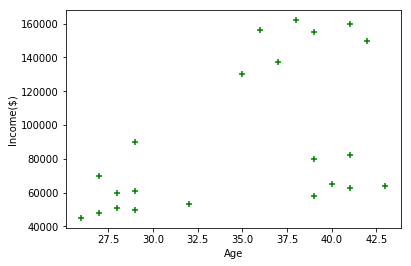

In [151]:
#To Visualize DataSet
import matplotlib.pyplot as mt
mt.scatter(df.Age,df["Income($)"],color="green",marker="+")
mt.xlabel("Age")
mt.ylabel("Income($)")
mt.show()

In [152]:
#Apply KMeans 
from  sklearn.cluster import KMeans

In [153]:
km=KMeans(n_clusters=3)#Make a 3 Number of Cluster

In [154]:
y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

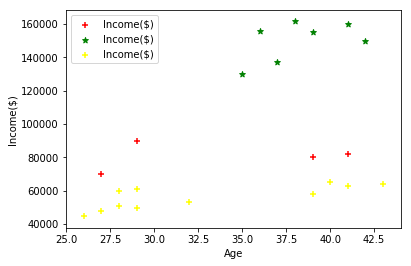

In [155]:
#Visualize Whole Dataset After Clustering
df["Predict"]=y_predict
df0=df[df["Predict"]==0]
df1=df[df["Predict"]==1]
df2=df[df["Predict"]==2]
mt.scatter(df0['Age'],df0['Income($)'],color="red",marker="+")
mt.scatter(df1['Age'],df1['Income($)'],color="green",marker="*")
mt.scatter(df2['Age'],df2['Income($)'],color="yellow",marker="+")
mt.xlabel("Age")
mt.ylabel("Income($)")
mt.legend()
mt.show()

In [156]:
#We Can Easily See the red Cluster it is not in a Proper manner because of we do not feature Scale Properly here Preprocessing work has started
from sklearn.preprocessing import MinMaxScaler#To Gert a dat in a Scaler form
scaler=MinMaxScaler()
#First Scale the value to respect of Income($)
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
#Second tScale the Value to respect of Age
scaler.fit(df[["Age"]])
df.Age=scaler.transform(df[["Age"]])
df

,Name,Age,Income($),Predict
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [157]:
#Again Apply KNN Model
y_Predict=km.fit_predict(df[['Age','Income($)']])
y_Predict
#Get Centroid
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

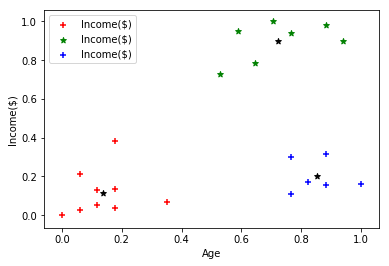

In [158]:
#Visualize the Whole Dataset Again Feature Scaling
df["Predict"]=y_Predict
df0=df[df["Predict"]==0]
df1=df[df["Predict"]==1]
df2=df[df["Predict"]==2]
mt.scatter(df0['Age'],df0['Income($)'],color="red",marker="+")
mt.scatter(df1['Age'],df1['Income($)'],color="green",marker="*")
mt.scatter(df2['Age'],df2['Income($)'],color="blue",marker="+")
#For Centroid Identification
mt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*",color="black")
mt.xlabel("Age")
mt.ylabel("Income($)")
mt.legend()
mt.show()

In [159]:
#Apply Elbow Technique for geting K Value
k_rng=range(1,10)
sse=[]
for i in k_rng:
    km=KMeans(n_clusters=i)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)
    
    

In [160]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553095,
 0.3491047094419565,
 0.2664030124668416,
 0.22020960864009395,
 0.17462386586687895,
 0.13265419827245162,
 0.10663983840905436]

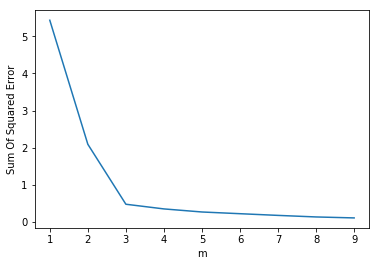

In [161]:
#Visualize Elgow Method Representation
mt.plot(k_rng,sse)
mt.xlabel("m")
mt.ylabel("Sum Of Squared Error")
mt.show()

In [162]:
km.predict([[0.352941,0.068376]])

array([3])